In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

In [15]:
def get_polynomial_design_matrix(x, degree):
    """
    Returns the polynomial design matrix of ``degree`` evaluated at ``x``.
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    # Start with an empty list where we are going to put the columns of the matrix
    cols = []
    # Loop over columns and add the polynomial
    for i in range(degree+1):
        cols.append(x ** i)
    return np.hstack(cols)

def get_fourier_design_matrix(x, L, num_terms):
    """
    Fourier expansion with ``num_terms`` cosines and sines.
    """
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    N = x.shape[0]
    cols = [np.ones((N, 1))]
    # Loop over columns and add the polynomial
    for i in range(1, num_terms):
        cols.append(np.cos(2 * i * np.pi / L * x))
        cols.append(sin(2 * i * np.pi / L * x))
    return np.hstack(cols)
                    
def get_rbf_design_matrix(x, x_centers, ell):
    # Make sure this is a 2D numpy array with only one column
    assert isinstance(x, np.ndarray), 'x is not a numpy array.'
    assert x.ndim == 2, 'You must make x a 2D array.'
    assert x.shape[1] == 1, 'x must be a column.'
    N = x.shape[0]
    cols = [np.ones((N, 1))]
    # Loop over columns and add the polynomial
    for i in range(x_centers.shape[0]):
        cols.append(np.exp(-(x - x_centers[i]) ** 2 / ell))
    return np.hstack(cols)

Text(0.5, 0, '$x$')

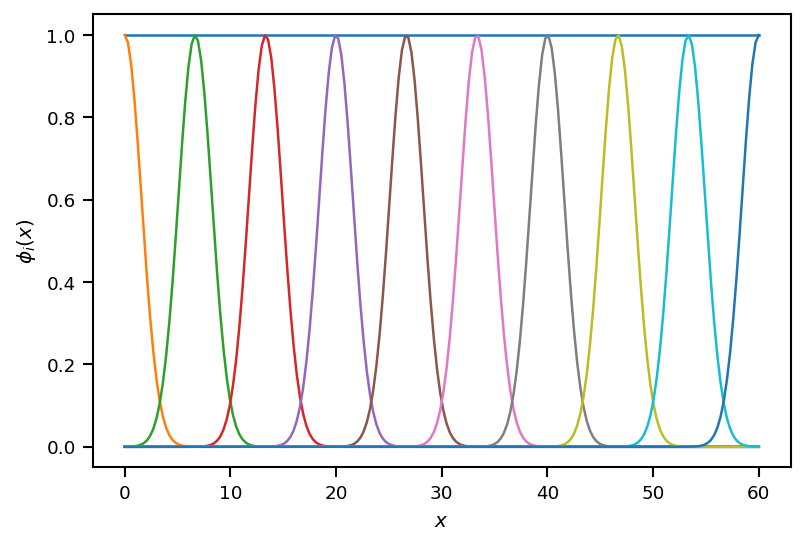

In [16]:
fig, ax = plt.subplots(dpi=150)
xx = np.linspace(0, 60, 200)
ell = 5.
num_terms = 10
x_centers = np.linspace(0, 60, num_terms)
XX = get_rbf_design_matrix(xx[:, None], x_centers, ell)
plt.plot(xx, XX)
plt.ylabel(r'$\phi_i(x)$')
plt.xlabel('$x$')

In [9]:
help(np.atleast_2d)

Help on function atleast_2d in module numpy:

atleast_2d(*arys)
    View inputs as arrays with at least two dimensions.
    
    Parameters
    ----------
    arys1, arys2, ... : array_like
        One or more array-like sequences.  Non-array inputs are converted
        to arrays.  Arrays that already have two or more dimensions are
        preserved.
    
    Returns
    -------
    res, res2, ... : ndarray
        An array, or list of arrays, each with ``a.ndim >= 2``.
        Copies are avoided where possible, and views with two or more
        dimensions are returned.
    
    See Also
    --------
    atleast_1d, atleast_3d
    
    Examples
    --------
    >>> np.atleast_2d(3.0)
    array([[3.]])
    
    >>> x = np.arange(3.0)
    >>> np.atleast_2d(x)
    array([[0., 1., 2.]])
    >>> np.atleast_2d(x).base is x
    True
    
    >>> np.atleast_2d(1, [1, 2], [[1, 2]])
    [array([[1]]), array([[1, 2]]), array([[1, 2]])]

